In [1]:
import exsample
import importlib
importlib.reload(exsample)
import exsample.exsample_benchmark
import exsample.exsample_sampler
importlib.reload(exsample.exsample_sampler)
importlib.reload(exsample.exsample_benchmark)
import matplotlib
import matplotlib.pyplot as plt
from exsample.exsample_benchmark import *
from exsample.exsample_sampler import *
importlib.reload(exsample.exsample_sampler)
importlib.reload(exsample.exsample_benchmark)
from exsample.exsample_sampler import *
from exsample.exsample_benchmark import *

In [2]:
from plotnine import *

In [3]:
from collections import namedtuple

In [5]:
from exsample.blazeit_tools import *

In [10]:
# root = '/big_fast_drive/orm/exsample_data/'
root = '/home/gridsan/omoll/data/exsample_data/'

dsm = [  DatasetMetadata(name='dashcam_unified_ng',
                    boxpath=f'{root}/dashcam_unified_ng.track_ids.clean.parquet',
                    track_id='tid',
                    frame_id='frame_idx',
                    video_len=1164226,
                    category='category',
                    categories=[
                        'person',
                        'bicycle',
                        'bus',
                        'truck',
                        'traffic light',
                        'fire hydrant',
                        'stop sign'],
                    default_chunks=(f'{root}/dash_metadata_by_frame.parquet', 'chunk_id'),
                         # this chunk id already is split by file and then 30 minutes
                    logitpath=f'{root}/dashcam_logits_secon_version.parquet',
                    logitsplit='subset'),
    DatasetMetadata(name='bdd1k',
                    boxpath=f'{root}/bdd1k.track_ids.clean.parquet',
                    track_id='tid',
                    frame_id='frame_idx',
                    video_len=389662,  # 1/3 frames of 1k ~40 second clips.
                    category='category',
                    categories=['person',
                                'rider',
                                'bus',
                                'truck',
                                'bike',
                                'motor',
                                'traffic light',
                                'traffic sign',],
                    default_chunks=(f'{root}/bdd_metadata_by_frame.parquet', 'clip_id'),
                    logitpath=f'{root}/bdd_logits_v0.parquet',
                    logitsplit='subset'),
        DatasetMetadata(name='bdd_mot_labels',
                boxpath=f'{root}/bdd_mot_labels.parquet',
                track_id='id',
                frame_id='frame_idx',
                video_len=None,
                category='category',
                categories=['car','pedestrian','truck','bicycle','rider','bus','motorcycle'],
                default_chunks=(f'{root}/bdd_mot_frames.parquet','video_name'),
                logitpath=None,
                logitsplit=None),
    DatasetMetadata(name='jackson-town-square',
                        boxpath=f'{root}/jackson-town-square_boxes_tids_filtered.parquet',
                        track_id='tid', frame_id='frame_idx', category='category',
                        categories=['car', 'person', 'truck', 'bus', 'dog', 'motorcycle'],
                        video_len=None, default_chunks=None, 
                        logitpath=None, logitsplit=None),
   DatasetMetadata(name='archie-day',
                    boxpath=f'{root}/archie-day_boxes_tids_filtered.parquet',
                    track_id='tid', frame_id='frame_idx', category='category',
                    categories=['car', 'bicycle', 'person', 'motorcycle', 'truck', 'bus'], 
                    video_len=None, default_chunks=None, 
                    logitpath=None, logitsplit=None),
   DatasetMetadata(name='amsterdam',
                    boxpath=f'{root}/amsterdam_boxes_tids_filtered.parquet',
                    track_id='tid', frame_id='frame_idx', category='category',
                    categories=['boat', 'car', 'person', 'bicycle', 'truck', 'motorcycle', 'dog'],                        video_len=None, default_chunks=None, 
                    logitpath=None, logitsplit=None)
]

In [11]:
bms = []
for m in dsm:
    bms.append(BenchmarkDataset(m))

In [12]:
hdfs = []
for bm in bms:
    df = get_histogram(bm, bm.default_chunks)
    hdfs.append(df)
hc = pd.concat(hdfs, ignore_index=True)

NameError: name 'get_histogram' is not defined

In [444]:
order_col = 'N'
def assign_order(gp, order_col):
    gp = gp.sort_values(order_col, ascending=False)
    gp = gp.assign(**{f'order{order_col}':np.arange(gp.shape[0])})
    return gp

In [445]:
hc

,N,mup,sigma,category,dataset,M,chunk
0,142,0.000489,0.001050,bicycle,dashcam_unified_ng,28,0
1,31,0.000531,0.001054,bicycle,dashcam_unified_ng,28,1
2,11,0.000480,0.000791,bicycle,dashcam_unified_ng,28,2
3,2,0.012263,0.011812,bicycle,dashcam_unified_ng,28,3
4,1,0.000444,0.000000,bicycle,dashcam_unified_ng,28,4
...,...,...,...,...,...,...,...
19173,7,0.002307,0.002216,truck,amsterdam,66,61
19174,10,0.001993,0.001990,truck,amsterdam,66,62
19175,5,0.001807,0.001638,truck,amsterdam,66,63
19176,1,0.001222,0.000000,truck,amsterdam,66,64


/nvme_drive/vsms3/lib/python3.7/site-packages/plotnine/facets/facet.py:558: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


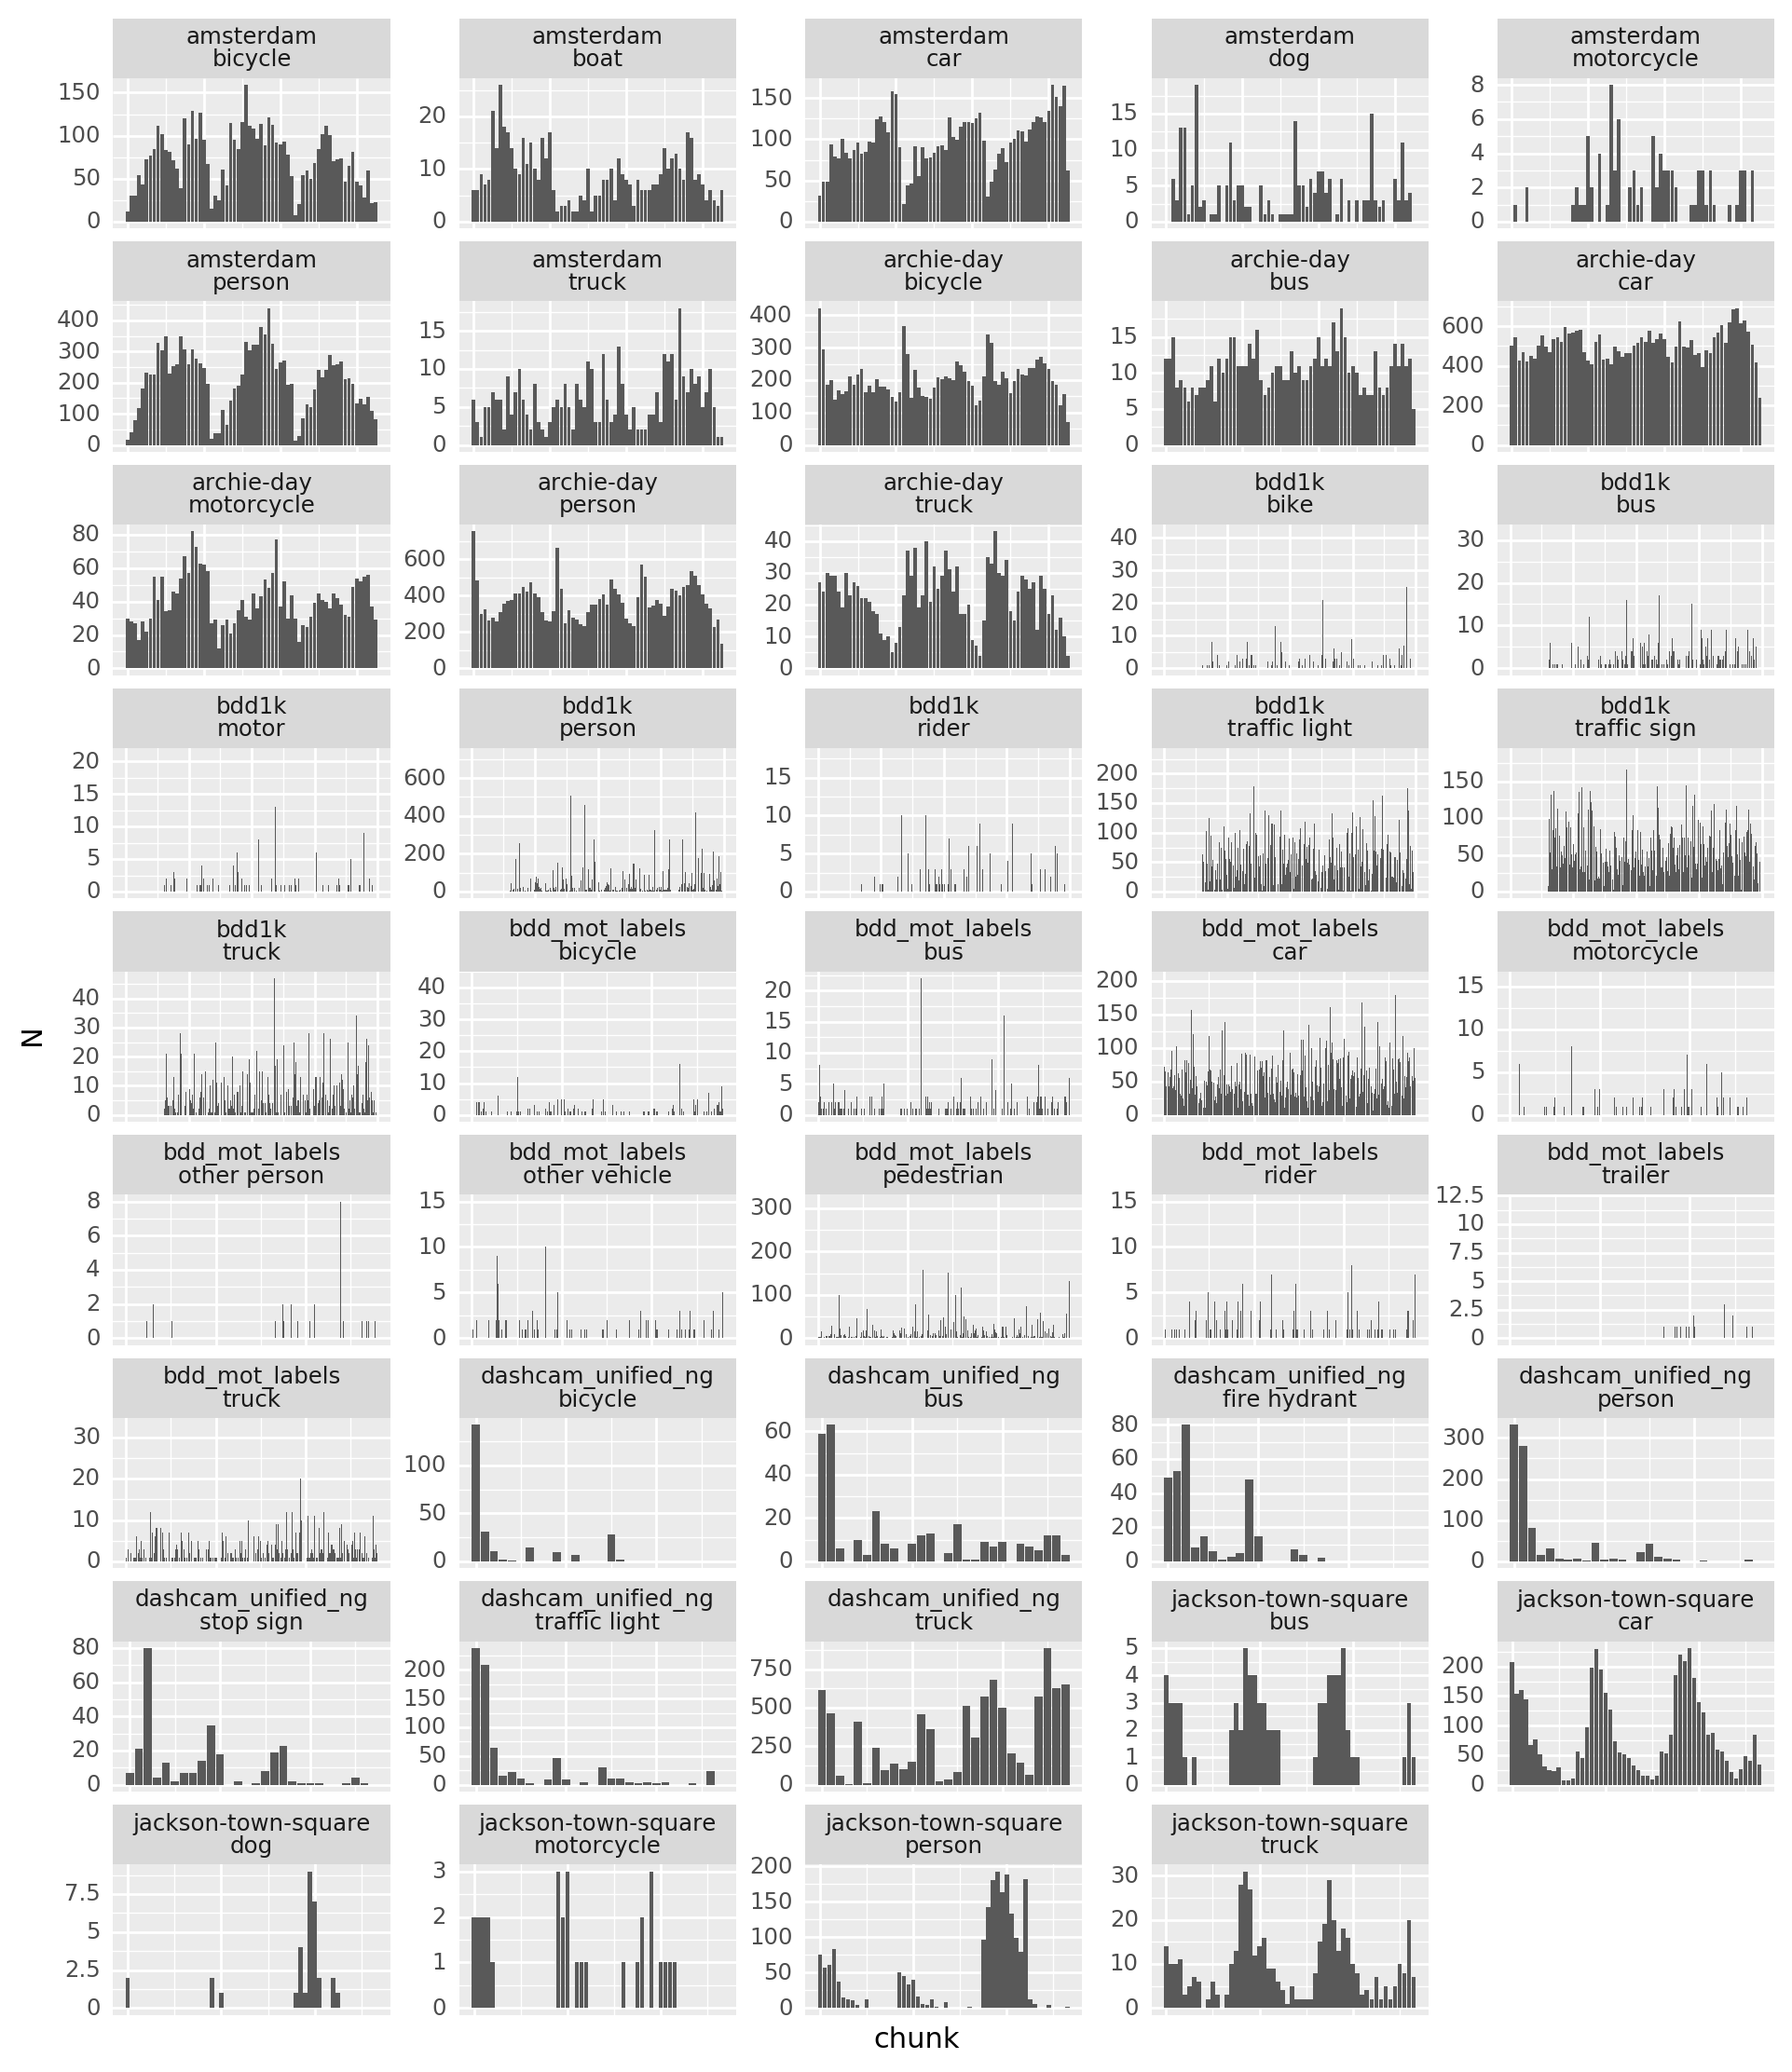

<ggplot: (8745168539726)>

In [131]:
(ggplot(hc) # archie day
  + geom_col(aes(x='chunk', y='N'))
  + facet_wrap(facets=['dataset','category'], scales='free', ncol=5)
  + theme(figure_size=(5*2.3,9*1.5), axis_text_x=element_blank(), axis_ticks=element_blank(), 
         subplots_adjust={'wspace': 0.25})
)

In [446]:
hc2 = hc.groupby(['dataset', 'category'], as_index=False).apply(lambda gp : assign_order(gp, 'N'))

/nvme_drive/vsms3/lib/python3.7/site-packages/plotnine/facets/facet.py:558: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


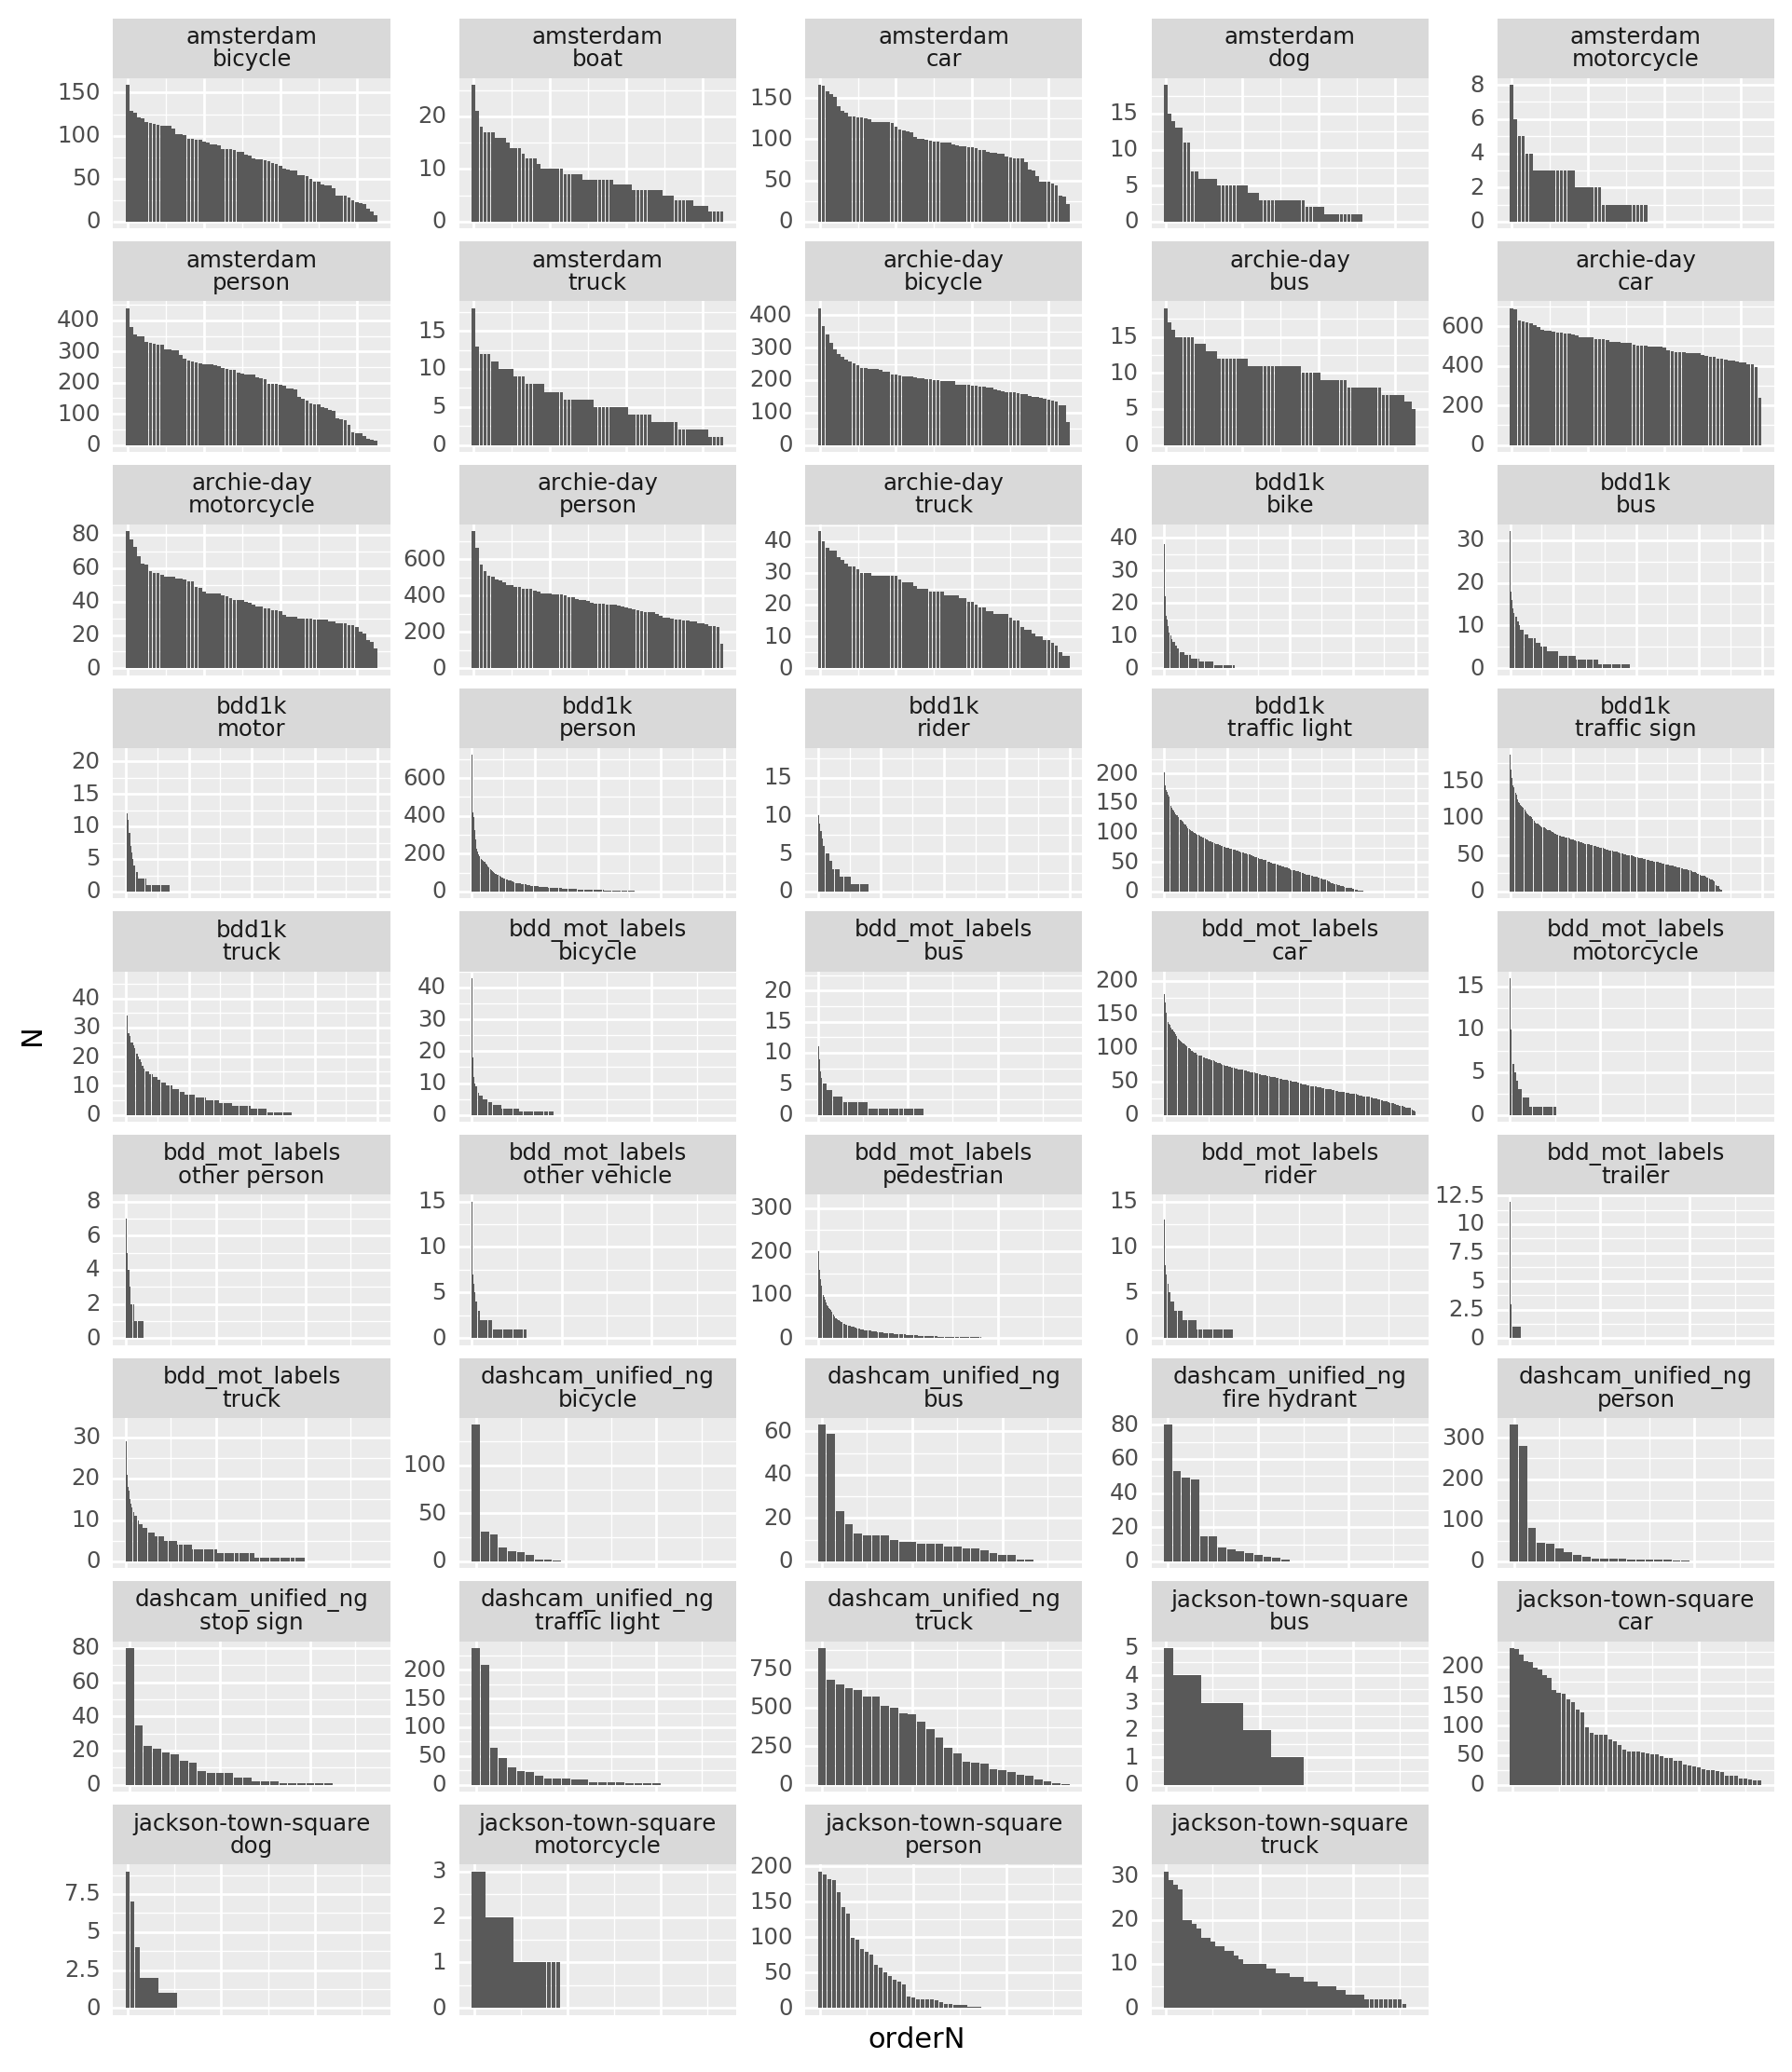

<ggplot: (-9223363291705524294)>

In [127]:
(ggplot(hc2) # archie day
  + geom_col(aes(x='orderN', y='N'))
  + facet_wrap(facets=['dataset','category'], scales='free', ncol=5)
  + theme(figure_size=(5*2.3,9*1.5), axis_text_x=element_blank(), axis_ticks=element_blank(), 
         subplots_adjust={'wspace': 0.25})
)

In [52]:
def generate_configs(num_reps=11):
    batch_size=10
    combos = []
    for ds in bms:
        for _ in range(num_reps):
            baselines = named_prod(
                order=['random', 'random+'],
                split=['nosplit'],
                batch_size=[batch_size],
                object_class=ds.categories,
                dataset=[ds],
                score_method=[None]
            )
            exsample = named_prod(
                order=['random+'],
                split=['default'],
                batch_size=[batch_size],
                object_class=ds.categories,
                dataset=[ds],
                score_method=[(StatScorer, dict(stat='gt', exp_model='ts'))]
            )

            combos.append(baselines)
            combos.append(exsample)

    configs = []
    for c in combos:
        for tup in c:
            configs.append(tup)
    return configs

In [53]:
import ray

In [54]:
ray.init()
from ray.util.multiprocessing import Pool
pool = Pool(10)

2020-09-13 11:04:17,838	INFO resource_spec.py:231 -- Starting Ray with 16.21 GiB memory available for workers and up to 8.11 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-09-13 11:04:18,812	INFO services.py:1193 -- View the Ray dashboard at localhost:8265


In [ ]:
cfgs = generate_configs(5)

In [28]:
def run_config(config, threshold=.1):            
    exp = make_experiment(config)
    exp.run_up_to(threshold=threshold, tqdm_enabled=False)
    return exp.get_results()

In [698]:
res_new.groupby(['dataet', ''])

,timestamp,ni,nf,wall_clock,order,split,batch_size,object_class,dataset,score_method,experiment_id,method,params,instance_f,frame_f,NI,NF,stat,exp_model
0,1.599965e+09,0,0,0.000000,random,nosplit,10,person,dashcam_unified_ng,None,4459225351292648552,random_nosplit_10_None,random_nosplit_10_None,0.000000,0.000000,921,1047815,None,None
1,1.599965e+09,0,0,0.002189,random,nosplit,10,person,dashcam_unified_ng,None,4459225351292648552,random_nosplit_10_None,random_nosplit_10_None,0.000000,0.000000,921,1047815,None,None
2,1.599965e+09,1,10,0.002211,random,nosplit,10,person,dashcam_unified_ng,None,4459225351292648552,random_nosplit_10_None,random_nosplit_10_None,0.001086,0.000010,921,1047815,None,None
3,1.599965e+09,1,10,0.002384,random,nosplit,10,person,dashcam_unified_ng,None,4459225351292648552,random_nosplit_10_None,random_nosplit_10_None,0.001086,0.000010,921,1047815,None,None
4,1.599965e+09,2,20,0.002402,random,nosplit,10,person,dashcam_unified_ng,None,4459225351292648552,random_nosplit_10_None,random_nosplit_10_None,0.002172,0.000019,921,1047815,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4610007,1.599966e+09,221,151810,27.526198,random+,default,10,dog,amsterdam,StatScorer_stat_gt_exp_model_ts,3187284453547307329,random+_default_10_StatScorer_stat_gt_exp_mode...,random+_default_10_StatScorer_stat_gt_exp_mode...,0.894737,0.042815,247,3545728,gt,ts
4610008,1.599966e+09,222,151820,27.526230,random+,default,10,dog,amsterdam,StatScorer_stat_gt_exp_model_ts,3187284453547307329,random+_default_10_StatScorer_stat_gt_exp_mode...,random+_default_10_StatScorer_stat_gt_exp_mode...,0.898785,0.042818,247,3545728,gt,ts
4610009,1.599966e+09,222,153570,27.784273,random+,default,10,dog,amsterdam,StatScorer_stat_gt_exp_model_ts,3187284453547307329,random+_default_10_StatScorer_stat_gt_exp_mode...,random+_default_10_StatScorer_stat_gt_exp_mode...,0.898785,0.043311,247,3545728,gt,ts
4610010,1.599966e+09,223,153580,27.784305,random+,default,10,dog,amsterdam,StatScorer_stat_gt_exp_model_ts,3187284453547307329,random+_default_10_StatScorer_stat_gt_exp_mode...,random+_default_10_StatScorer_stat_gt_exp_mode...,0.902834,0.043314,247,3545728,gt,ts


In [181]:
#res_new = pd.concat(res)
df = pd.read_parquet('./data/sample_results.parquet')

In [14]:
def method_rename(m):
    mapping = {'random_nosplit_10_None':'random', 
               'random+_nosplit_10_None':'random+',
               'random+_default_10_StatScorer_stat_gt_exp_model_ts_gt_ts':'this work'}
    return mapping[m]

In [15]:
df = df.assign(method=df.method.map(method_rename))
df = df.assign(task=make_composite(df, ['dataset', 'object_class']))

In [182]:
df

,timestamp,ni,nf,wall_clock,order,split,batch_size,object_class,dataset,score_method,experiment_id,method,params,instance_f,frame_f,NI,NF,stat,exp_model
0,1.599965e+09,0,0,0.000000,random,nosplit,10,person,dashcam_unified_ng,None,4459225351292648552,random_nosplit_10_None,random_nosplit_10_None,0.000000,0.000000,921,1047815,None,None
1,1.599965e+09,0,0,0.002189,random,nosplit,10,person,dashcam_unified_ng,None,4459225351292648552,random_nosplit_10_None,random_nosplit_10_None,0.000000,0.000000,921,1047815,None,None
2,1.599965e+09,1,10,0.002211,random,nosplit,10,person,dashcam_unified_ng,None,4459225351292648552,random_nosplit_10_None,random_nosplit_10_None,0.001086,0.000010,921,1047815,None,None
3,1.599965e+09,1,10,0.002384,random,nosplit,10,person,dashcam_unified_ng,None,4459225351292648552,random_nosplit_10_None,random_nosplit_10_None,0.001086,0.000010,921,1047815,None,None
4,1.599965e+09,2,20,0.002402,random,nosplit,10,person,dashcam_unified_ng,None,4459225351292648552,random_nosplit_10_None,random_nosplit_10_None,0.002172,0.000019,921,1047815,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4610007,1.599966e+09,221,151810,27.526198,random+,default,10,dog,amsterdam,StatScorer_stat_gt_exp_model_ts,3187284453547307329,random+_default_10_StatScorer_stat_gt_exp_mode...,random+_default_10_StatScorer_stat_gt_exp_mode...,0.894737,0.042815,247,3545728,gt,ts
4610008,1.599966e+09,222,151820,27.526230,random+,default,10,dog,amsterdam,StatScorer_stat_gt_exp_model_ts,3187284453547307329,random+_default_10_StatScorer_stat_gt_exp_mode...,random+_default_10_StatScorer_stat_gt_exp_mode...,0.898785,0.042818,247,3545728,gt,ts
4610009,1.599966e+09,222,153570,27.784273,random+,default,10,dog,amsterdam,StatScorer_stat_gt_exp_model_ts,3187284453547307329,random+_default_10_StatScorer_stat_gt_exp_mode...,random+_default_10_StatScorer_stat_gt_exp_mode...,0.898785,0.043311,247,3545728,gt,ts
4610010,1.599966e+09,223,153580,27.784305,random+,default,10,dog,amsterdam,StatScorer_stat_gt_exp_model_ts,3187284453547307329,random+_default_10_StatScorer_stat_gt_exp_mode...,random+_default_10_StatScorer_stat_gt_exp_mode...,0.902834,0.043314,247,3545728,gt,ts


In [17]:
gps = {}
for ((d,oc,m), gp) in df.groupby(['dataset', 'object_class', 'method']):
    gps[(d,oc,m)] = gp

In [94]:
#cols =['dataset', 'category', 'frames', 'scan_rate', 'sample_rate', 'random_eq']
def make_equivalent(bms,  gps, scan_rate=200, sample_rate=20, method = 'this work'):
#bms[-1].frame_idx.shape[0]
# sample_rate = 20
    cols = ['dataset', 'category', 'frames', 'scantime', 'scan_rate', 'sample_rate', 'random_eq']
    tuples = []
    for bm in bms:
        scanned_frames = bm.frame_idx.shape[0] - len(bm.excluded_set)
        for c in bm.categories:
            if bm.name not in ['bdd_mot_labels']:
                scantime = scanned_frames/scan_rate
                random_eq = scantime*sample_rate
                tuples.append((bm.name, c, scanned_frames, scantime, scan_rate, sample_rate, random_eq))

    gpeq = []
    for (dsn, ocn, NF, scantime, _, _, frm) in tuples:
        gp = gps[(dsn, ocn, method)]
        byexp = gp[gp.nf <= frm].groupby('experiment_id')[['ni', 'nf']].max()
        med = byexp.median()
        nimed = med['ni']
        nfmed = med['nf']
        fraction_data = med['nf']/gp.NF.max()
        tot = gp.NI.max()
        gpeq.append((nimed, nimed/tot, tot, nfmed, nfmed/sample_rate, fraction_data, method))

        
    tups_df = pd.DataFrame(tuples, columns=cols)
    gpeq_df =  pd.DataFrame(gpeq, columns=['ni', 'recall', 'NI', 'nf', 'total_sec', 'fraction_data', 'method'])
    return pd.concat([tups_df, gpeq_df], axis=1)

In [95]:
pairs = [('jackson-town-square', 'person'),
('amsterdam', 'boat'),
('bdd1k','motor'),
('archie-day', 'car'),
('dashcam_unified_ng','bicycle')]

dic = {'dashcam_unified_ng':'A-dashcam', 'bdd1k':'B-bdd1k', 
 'jackson-town-square':'C-night street', 
 'amsterdam':'E-amsterdam',
       'archie-day':'D-archie'}

In [179]:
len(gps)

123

In [96]:
tw = make_equivalent(bms,  gps, scan_rate=200, sample_rate=20, method = 'this work')
#rnd = make_equivalent(bms,  gps, scan_rate=1000, sample_rate=20, method = 'random')
twrec = tw[tw[['dataset', 'category']].apply(tuple,axis=1).isin(pairs)]

In [97]:
scan_times = [('dashcam', 1047815, 10478.15),
('bdd1k',329662, 3296.62),
('town-square', 2880000, 28800.00),
('archie-day', 3539751, 35397.51),
('amsterdam', 3545728, 35457.28)]

In [98]:
scan_time_df = pd.DataFrame(scan_times, columns=['dataset', 'frames', 'scan_time'])

In [100]:
scan_time_df= scan_time_df.assign(scan_time=pd.to_timedelta(scan_time_df['scan_time'], unit='s'))

In [102]:
print(scan_time_df.set_index('dataset').to_latex())

\begin{tabular}{lrr}
\toprule
{} &   frames &              scan\_time \\
dataset     &          &                        \\
\midrule
dashcam     &  1047815 & 0 days 02:54:38.150000 \\
bdd1k       &   329662 & 0 days 00:54:56.620000 \\
town-square &  2880000 &        0 days 08:00:00 \\
archie-day  &  3539751 & 0 days 09:49:57.510000 \\
amsterdam   &  3545728 & 0 days 09:50:57.280000 \\
\bottomrule
\end{tabular}



In [113]:
scatter_data = tw[['dataset', 'category', 'recall', 'nf', 'total_sec', 'fraction_data']]

In [115]:
scatter_data = scatter_data.sort_values(['recall'], ascending=False).reset_index(drop=True).reset_index(drop=False)
#scatter_data.assign(orderN=np.arange))

In [124]:
plot_name = scatter_data.dataset.map(lambda x : {'jackson-town-square':'town-square', 
                                    'dashcam_unified_ng':'dashcam', 'bdd1k':'bdd'}.get(x,x))
scatter_data = scatter_data.assign(dataset=plot_name)

In [171]:
rcplot = (ggplot(data=scatter_data) # archie day
  + geom_col(aes(x='index', y='recall', fill='dataset'), alpha=.7)
  + scale_x_continuous(name='',limits=(.5,scatter_data.shape[0]-.5))
  + theme(figure_size=(3*2.2,1*2.2), 
          axis_text_x=element_blank(), 
          axis_ticks=element_blank(),
          legend_position='top',
          legend_box_margin=0,
          axis_text_y=element_text(size=12),
          legend_text=element_text(size=11),
          subplots_adjust={'wspace': 0.25})
 + scale_y_continuous(breaks=[0,.6,.7,.8,.9])
 + scale_fill_discrete(name='')
 + annotate('hline', yintercept=.9)
 + geom_text(aes(label='category', x='index', y=.05), angle=90, va='bottom')
)

In [183]:
scatter_data['index']

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
Name: index, dtype: int64

In [176]:
scatter_data

,index,dataset,category,recall,nf,total_sec,fraction_data
0,0,dashcam,bicycle,0.903614,69560.0,3478.0,0.066386
1,1,amsterdam,dog,0.902834,140830.0,7041.5,0.039718
2,2,dashcam,fire hydrant,0.902027,91260.0,4563.0,0.087096
3,3,amsterdam,truck,0.901299,45060.0,2253.0,0.012708
4,4,amsterdam,motorcycle,0.901099,142540.0,7127.0,0.040200
5,5,amsterdam,boat,0.900778,4370.0,218.5,0.001232
6,6,town-square,truck,0.900596,76540.0,3827.0,0.026576
7,7,archie-day,truck,0.900538,99860.0,4993.0,0.028211
8,8,dashcam,traffic light,0.900415,99020.0,4951.0,0.094501
9,9,archie-day,motorcycle,0.900186,144580.0,7229.0,0.040845


/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/layer.py:381: PlotnineWarning: position_stack : Removed 1 rows containing missing values.
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_text : Removed 1 rows containing missing values.


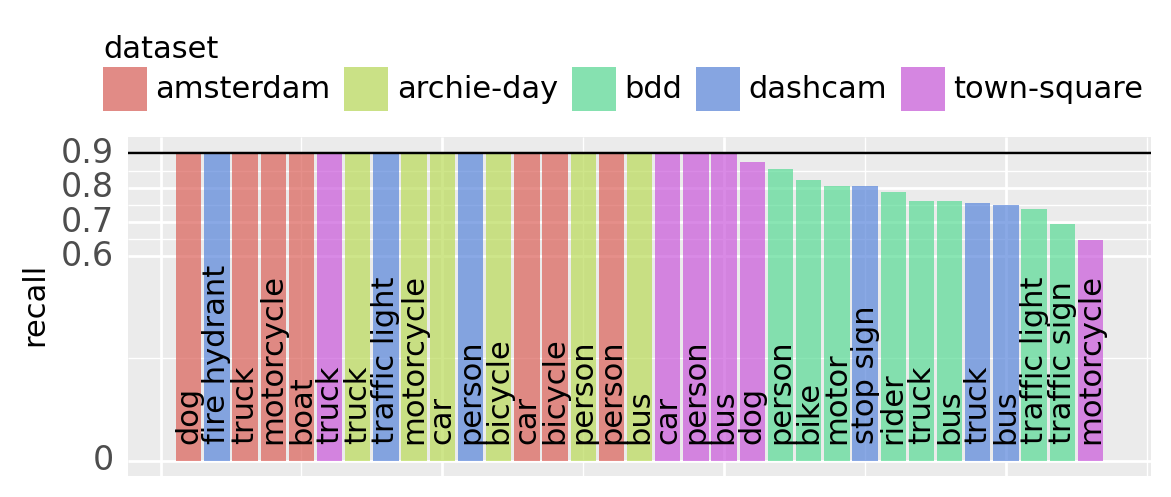

<ggplot: (8753617735810)>

In [172]:
rcplot

In [173]:
rcplot.save('./assets/rcplot.pdf')

/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.6000000000000005 x 2.2 in image.
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./assets/rcplot.pdf
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/layer.py:381: PlotnineWarning: position_stack : Removed 1 rows containing missing values.
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_text : Removed 1 rows containing missing values.


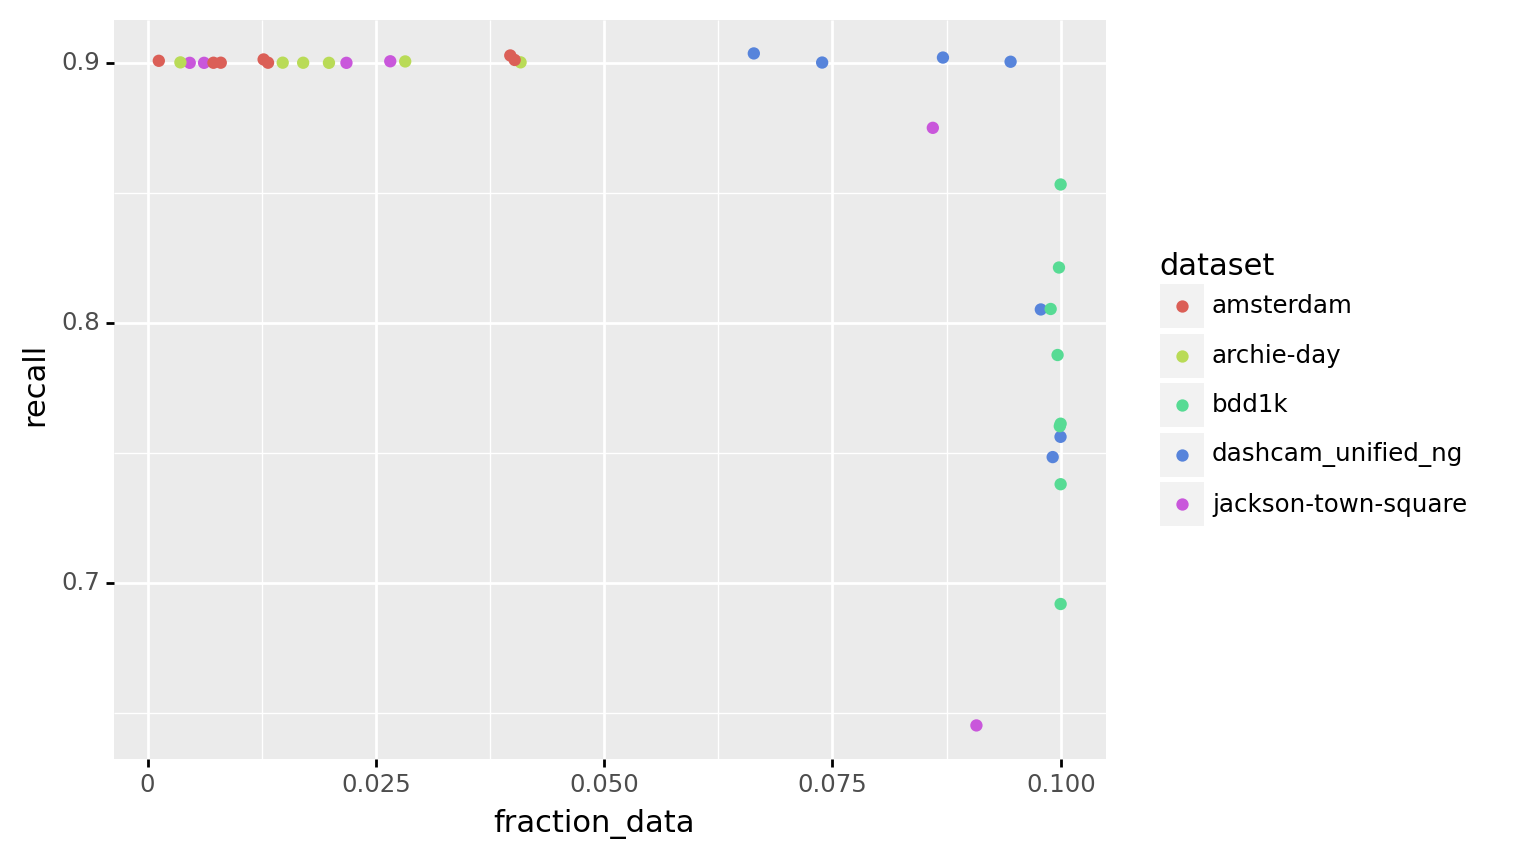

<ggplot: (8754155982827)>

In [114]:
pt = (ggplot(data=scatter_data)
 + geom_col(mapping=aes(x='fraction_data', y='recall', color='dataset')))

In [106]:
tab = twrec[['dataset', 'category', 'recall', 'nf', 'total_sec']]

In [107]:
print(tab.assign(dataset=tab.dataset.map(lambda x : dic[x])).set_index(['dataset', 'category']).round(2).to_latex())

\begin{tabular}{llrrr}
\toprule
            &      &  recall &       nf &  total\_sec \\
dataset & category &         &          &            \\
\midrule
A-dashcam & bicycle &    0.90 &  69560.0 &     3478.0 \\
B-bdd1k & motor &    0.81 &  32600.0 &     1630.0 \\
C-night street & person &    0.90 &  17820.0 &      891.0 \\
D-archie & car &    0.90 &  12730.0 &      636.5 \\
E-amsterdam & boat &    0.90 &   4370.0 &      218.5 \\
\bottomrule
\end{tabular}



In [715]:
def values_at(df, dataset, object_class, method, nf):
    df = df[[(df.dataset == dataset)
            & (df.object_class == object_class)
            & (df.method == mthod)
            ]]
    
    
    filt = df[df.nf <= nf]
    max_ni = filt.groupby('experiment_id').ni.max()
    return max_ni

In [714]:
df.groupby(['method', 'task', 'NI', 'NF', 'nf']).agg(c=pd.NamedAgg('experiment_id', lambda  x : np.unique(x).shape[0]))

c
method    task                      NI   NF      nf       
random    amsterdam_bicycle         4852 3545728 0      11
                                                 10     11
                                                 20     11
                                                 30     11
                                                 40     10
...                                                     ..
this work jackson-town-square_truck 503  2880000 83860   1
                                                 84180   1
                                                 84190   1
                                                 84520   1
                                                 84530   1

[632615 rows x 1 columns]

In [290]:
len(bms[0].excluded_set), bms[0].frame_idx.shape[0]

(116411, 1164226)

In [424]:
tab = pd.DataFrame([('expensive inference', 20),('scanning+cheap inference', 100),('random access + decode',20)], columns=['task', 'throughput (fps)'])

In [425]:
tab = tab.assign(fraction_proxy=[.1, 1., .0001],
           fraction_random=[0., 0., .01])

In [426]:
sproxy = tab.fraction_proxy*bms[0].frame_idx.shape[0]
srandom = tab.fraction_random*bms[0].frame_idx.shape[0]

tab = tab.assign(frames_proxy=sproxy, time_proxy=sproxy/tab['throughput (fps)'],
           frames_random=srandom, time_random=srandom/tab['throughput (fps)'])

In [398]:
# ## used to renormalize plots
# fs = ['gms_bdd.csv', 'dashcam_gms.csv']
# keys = ['dataset', 'object_class', 'metric', 'recall', 'order_key', 'norder_key']

# def renormalize(gms):
#     acc = []
#     for (k,gp) in gms.groupby(keys):
#         qs = gp[['q2', 'q5', 'q8']]
#         r = gp[gp.method == 'random'][['q2','q5','q8']]
#         qs2 = pd.concat([gp[['method', 'q2', 'q5', 'q8']] , pd.DataFrame({'method':['random+'], 
#                                                        'q2':[1.], 'q5':[1.], 'q8':[1.]})], ignore_index=True)
#         rat = qs2[['q2','q5','q8']]/r.iloc[0]
#         ans = qs2.assign(**dict(list(rat.items()))).assign(**dict(zip(keys,k)))
#         acc.append(ans)
#     return pd.concat(acc, ignore_index=True)


# for f in fs:
#     gms = pd.read_csv(f)
#     renormalize(gms).to_csv('renormalized_{}'.format(f))

In [427]:
st = tab.set_index('task')[['throughput (fps)', 'fraction_proxy',  'frames_proxy','time_proxy',
                           'fraction_random', 'frames_random','time_random',]]

In [428]:
st.round(4)

,throughput (fps),fraction_proxy,frames_proxy,time_proxy,fraction_random,frames_random,time_random
task,,,,,,,
expensive inference,20,0.1000,1.164226e+05,5821.1300,0.00,0.00,0.000
scanning+cheap inference,100,1.0000,1.164226e+06,11642.2600,0.00,0.00,0.000
random access + decode,20,0.0001,1.164226e+02,5.8211,0.01,11642.26,582.113


In [679]:
st

,throughput (fps),fraction_proxy,frames_proxy,time_proxy,fraction_random,frames_random,time_random
task,,,,,,,
expensive inference,20,0.1000,1.164226e+05,5821.13000,0.00,0.00,0.000
scanning+cheap inference,100,1.0000,1.164226e+06,11642.26000,0.00,0.00,0.000
random access + decode,20,0.0001,1.164226e+02,5.82113,0.01,11642.26,582.113


In [680]:
## assuming scanning at cheap inference of 1000fps, and sampling at 20fps, what recall would sampling have reached 
# after that many samples?

In [282]:
print(tab.set_index('task').to_latex())

\begin{tabular}{lr}
\toprule
{} &  throughput (fps) \\
task                     &                   \\
\midrule
expensive inference      &                10 \\
scanning+cheap inference &               100 \\
random access + decode   &                20 \\
\bottomrule
\end{tabular}



In [111]:
def savings_at(records, task_keys, method_keys,
               fixed_metric,
               fixed_metric_level,
               measured_metric,
               quantiles=[.1, .5, .9],
               experiment_key='experiment_id', reference_method='None_random_nosplit'):
    assert fixed_metric in ['nf', 'ni']
    assert measured_metric in ['nf', 'ni']

    rel = {'nf':'NF', 'ni':'NI'}
    if 0 < fixed_metric_level < 1:
        rel_col = records[rel[fixed_metric]]
        fixed_metric_level = np.round(fixed_metric_level*rel_col).astype('int')
        
    pred = records[fixed_metric] >= fixed_metric_level 
    records = records.assign(metric=records[measured_metric], level=fixed_metric_level)

    sc = records[pred].groupby(task_keys + method_keys + ['experiment_id', 'level'],
                               as_index=False).metric.min()

    def quantile_agg(q):
        return lambda x: np.quantile(x, q)

    msc = sc.groupby(task_keys + method_keys + ['level']).agg(lower=pd.NamedAgg('metric', quantile_agg(quantiles[0])),
                                                  metric=pd.NamedAgg('metric', quantile_agg(quantiles[1])),
                                                  upper=pd.NamedAgg('metric', quantile_agg(quantiles[2]))
                                                  )
    msc = msc.reset_index()
    gps = []
    for (ks, gp) in msc.groupby(task_keys + ['level']):
        row = (gp[method_keys] == reference_method).all(axis=1)
        assert row.sum() <= 1, 'must have atmost one reference row per group'
        if row.sum() > 0:
            ref = gp[row].metric.iloc[0]
        else:
            ref = np.nan

        other = gp.metric
        if measured_metric == 'nf':
            gp = gp.assign(ratio=(ref + 1) / (other + 1))
        elif measured_metric == 'ni':
            gp = gp.assign(ratio=(other + 1)/(ref+1))
            
        gp = gp.assign(ref=ref)
        gps.append(gp)

    return pd.concat(gps, ignore_index=True)

In [102]:
svgs = svgs.assign(ratio=svgs.ratio.pow(-1))

In [697]:
df

,N,mup,sigma,category,dataset,M,chunk
0,12,0.001921,0.002036,bicycle,amsterdam,66,0
1,30,0.002422,0.002819,bicycle,amsterdam,66,1
2,30,0.002164,0.002324,bicycle,amsterdam,66,2
3,54,0.002339,0.002835,bicycle,amsterdam,66,3
4,43,0.003143,0.003721,bicycle,amsterdam,66,4
...,...,...,...,...,...,...,...
457,7,0.002307,0.002216,truck,amsterdam,66,61
458,10,0.001993,0.001990,truck,amsterdam,66,62
459,5,0.001807,0.001638,truck,amsterdam,66,63
460,1,0.001222,0.000000,truck,amsterdam,66,64


In [173]:
savings_at(df, fixed_metric='ni',
                           fixed_metric_level=.9,
                           measured_metric='nf',
                           task_keys=['task', 'dataset', 'object_class'], 
                           method_keys=['method'],
                           quantiles=[.25,.5,.75],
                           reference_method=('random'))

,task,dataset,object_class,method,level,lower,metric,upper,ratio,ref
0,amsterdam_bicycle,amsterdam,bicycle,random,4367,87865,89050,90175,1.000000,89050
1,amsterdam_bicycle,amsterdam,bicycle,random+,4367,48730,49390,49735,1.802980,89050
2,amsterdam_bicycle,amsterdam,bicycle,this work,4367,46195,46780,47540,1.903572,89050
3,amsterdam_boat,amsterdam,boat,random,463,5505,5930,6300,1.000000,5930
4,amsterdam_boat,amsterdam,boat,random+,463,4600,5110,5490,1.160438,5930
...,...,...,...,...,...,...,...,...,...,...
118,jackson-town-square_person,jackson-town-square,person,random+,1863,35050,35540,37880,1.590586,56530
119,jackson-town-square_person,jackson-town-square,person,this work,1863,17240,17820,18215,3.172156,56530
120,jackson-town-square_truck,jackson-town-square,truck,random,453,117675,128950,138905,1.000000,128950
121,jackson-town-square_truck,jackson-town-square,truck,random+,453,82425,83940,85525,1.536210,128950


In [174]:
svgs = []
# levels = [np.arange(1,50,1),
#           np.arange(50,500,step=5),
#           np.arange(500,1000,step=10),
#          ]
# all_levels = sum(map(list,levels),[])
all_levels = np.arange(.05, .95, .05)
for level in all_levels:    
    svgs.append(savings_at(df, fixed_metric='ni',
                           fixed_metric_level=level,
                           measured_metric='nf',
                           task_keys=['task', 'dataset', 'object_class'], 
                           method_keys=['method'],
                           quantiles=[.25,.5,.75],
                           reference_method=('random')).assign(rel_level=level))
svgs = pd.concat(svgs, ignore_index=True)
#svgs = svgs.assign(ratio=svgs.ratio.pow(-1))

In [176]:
svgs.to_parquet('savings.parquet')

/nvme_drive/vsms3/lib/python3.7/site-packages/pyarrow/pandas_compat.py:383: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
/nvme_drive/vsms3/lib/python3.7/site-packages/pyarrow/pandas_compat.py:384: FutureWarning: RangeIndex._stop is deprecated and will be removed in a future version. Use RangeIndex.stop instead
/nvme_drive/vsms3/lib/python3.7/site-packages/pyarrow/pandas_compat.py:385: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead


In [195]:
svgs = svgs[~svgs.dataset.isin(['bdd_mot_labels'])]
svgs = svgs.assign(rel_level=np.round(svgs.rel_level, 2))

In [209]:
bylevel = svgs.groupby(['method', 'rel_level']).agg(min_savings=pd.NamedAgg('ratio', np.min),
                                          median_savings=pd.NamedAgg('ratio', np.median),
                                          max_savings=pd.NamedAgg('ratio', np.max)).reset_index()

bylevel = bylevel[(bylevel.method == 'this work')]

In [256]:
recall_summary = bylevel.assign(recall=bylevel.rel_level)[['recall', 'min_savings','median_savings', 'max_savings']]

In [262]:
print(recall_summary[recall_summary.recall.isin([.1, .5, .9])].round(1).set_index('recall').to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  min\_savings &  median\_savings &  max\_savings \\
recall &              &                 &              \\
\midrule
0.1    &          0.8 &             1.4 &          6.9 \\
0.5    &          0.9 &             1.7 &          6.9 \\
0.9    &          1.2 &             1.9 &          4.8 \\
\bottomrule
\end{tabular}



In [431]:
bydataset2 = agg1.groupby(['dataset', 'method', 'object_class']).agg( min_savings=pd.NamedAgg('ratio', np.min),
                                                    median_savings=pd.NamedAgg('ratio', np.median),
                                                    max_savings=pd.NamedAgg('ratio', np.max), 
                                                   num_classes=pd.NamedAgg('ratio', lambda x : x.shape[0])).reset_index()


In [632]:
agg3 = agg2.assign(dataset=agg2.dataset.map(lambda x : dic[x]))
agg3 = agg3.assign(cl=agg3.dataset + '/'  + agg3.object_class)

In [633]:
agg3

,dataset,object_class,method,ratio,cl
2,E-amsterdam,bicycle,this work,1.604887,E-amsterdam/bicycle
5,E-amsterdam,boat,this work,0.949685,E-amsterdam/boat
8,E-amsterdam,car,this work,1.461302,E-amsterdam/car
11,E-amsterdam,dog,this work,1.630096,E-amsterdam/dog
14,E-amsterdam,motorcycle,this work,1.693879,E-amsterdam/motorcycle
17,E-amsterdam,person,this work,1.487576,E-amsterdam/person
20,E-amsterdam,truck,this work,1.369018,E-amsterdam/truck
23,D-archie,bicycle,this work,1.455829,D-archie/bicycle
26,D-archie,bus,this work,1.200309,D-archie/bus
29,D-archie,car,this work,1.276124,D-archie/car


In [599]:
hcs = []
for (d,c) in pairs:
    hcs.append(hc2[(hc2.category == c) & (hc2.dataset ==d)])

In [652]:
hc2short = pd.concat(hcs)
hc2short = hc2short.assign(dataset=hc2short.dataset.map(lambda x : dic[x]))
hc2short = hc2short.assign(cl=hc2short.dataset + '/'  + hc2short.category)
hc2short = hc2short.assign(cl=pd.Categorical(hc2short.cl, categories=['A-dashcam/bicycle', 
                                                                     'B-bdd1k/motor', 'C-night street/person','D-archie/car', 'E-amsterdam/boat'], ordered=True))

skew_metric = []
gps = []
for (k,gp) in hc2short.groupby('cl'):
    gp = gp.sort_values('orderN')
    nsum = gp.N.cumsum()
    tot = gp.N.sum()
    f = .5
    savings = agg3[agg3.cl == k].ratio.iloc[0]
    nch = (nsum/tot <= f)
    nch = nch.shift().fillna(True)
    gp = gp.assign(top=nch)
    S=gp.shape[0]*f/nch.sum()
    maxn = gp.N.max()
    maxm = gp.shape[0]
    skew_metric.append((k,S,maxn, tot, maxm, savings))
    gps.append(gp)
    
hc2gp = pd.concat(gps)
sdf = pd.DataFrame(skew_metric, columns=['cl', 'S', 'maxn', 'totn', 'maxm', 'savings'])

In [639]:
sdf

,cl,S,maxn,maxm,savings
0,A-dashcam/bicycle,14.000000,142,28,6.509124
1,B-bdd1k/motor,19.230769,21,1000,2.319257
2,C-night street/person,4.500000,193,54,3.062652
3,D-archie/car,1.100000,691,66,1.276124
4,E-amsterdam/boat,1.650000,26,66,0.949685


In [653]:
sdf = sdf.assign(x=sdf.maxm, ys=sdf.maxn*.5, yn=sdf.maxn)
sdf = sdf.assign(order='(by N)')
sdf = sdf.assign(order=pd.Categorical(sdf.order, categories=['(by time)', '(by N)'], ordered=True))

In [654]:
hc2pl = pd.concat([hc2gp.assign(order='(by time)'),
                    hc2gp.assign(chunk=hc2gp.orderN, order='(by N)')])
hc2pl = hc2pl.assign(order=pd.Categorical(hc2pl.order, categories=['(by time)', '(by N)'], ordered=True))

In [645]:
sdf

,cl,S,maxn,maxm,savings,x,ys,yn,order
0,A-dashcam/bicycle,14.000000,142,28,6.509124,28,71.0,142,(by N)
1,B-bdd1k/motor,19.230769,21,1000,2.319257,1000,10.5,21,(by N)
2,C-night street/person,4.500000,193,54,3.062652,54,96.5,193,(by N)
3,D-archie/car,1.100000,691,66,1.276124,66,345.5,691,(by N)
4,E-amsterdam/boat,1.650000,26,66,0.949685,66,13.0,26,(by N)


In [606]:
hc2pl

N       mup     sigma category      dataset   M  chunk  orderN  \
28 0      142  0.000489  0.001050  bicycle    A-dashcam  28      0       0   
   1       31  0.000531  0.001054  bicycle    A-dashcam  28      1       1   
   15      28  0.004281  0.006101  bicycle    A-dashcam  28     15       2   
   6       15  0.001063  0.001823  bicycle    A-dashcam  28      6       3   
   2       11  0.000480  0.000791  bicycle    A-dashcam  28      2       4   
...       ...       ...       ...      ...          ...  ..    ...     ...   
1  18846    3  0.480389  0.415721     boat  E-amsterdam  66     61      61   
   18813    2  0.496250  0.388372     boat  E-amsterdam  66     62      62   
   18809    2  0.497778  0.388588     boat  E-amsterdam  66     63      63   
   18804    2  0.499852  0.390836     boat  E-amsterdam  66     64      64   
   18808    2  0.493528  0.384609     boat  E-amsterdam  66     65      65   

                         cl    top      order  
28 0      A-dashcam/bicycle   True  (by time)  
   1      A-dashcam/bicycle  False  (by time)  
   15     A-dashcam/bicycle  False  (by time)  
   6      A-dashcam/bicycle  False  (by time)  
   2      A-dashcam/bicycle  False  (by time)  
...                     ...    ...        ...  
1  18846   E-amsterdam/boat  False     (by N)  
   18813   E-amsterdam/boat  False     (by N)  
   18809   E-amsterdam/boat  False     (by N)  
   18804   E-amsterdam/boat  False     (by N)  
   18808   E-amsterdam/boat  False     (by N)  

[2428 rows x 11 columns]

In [ ]:
## one plot with results 

In [666]:
pdf = hc2pl[hc2pl.order == '(by N)']
skewplot = (ggplot(pdf) # archie day
  + geom_col(aes(x='chunk', y='N', fill='top', color='top'))
  + geom_text(aes(x='x', y='ys', label='S'), format_string='S={:3.2g}', data=sdf, size=7, va='bottom', ha='right')
 + geom_text(aes(x='x', y='ys', label='savings'), data=sdf, format_string='savings={:1.1g}', size=7, va='top', ha='right')
#  + geom_hline(aes(yintercept='yn'), data=sdf, color='gray')
  + geom_text(aes(x='x', y='yn', label='totn'), data=sdf, format_string='N={:5.5g}', size=7, va='top', ha='right')
  + facet_wrap(facets=['cl'], scales='free', ncol=3)
  + theme(figure_size=(3.7,2.2), axis_text_x=element_blank(), axis_ticks=element_blank(), 
          axis_text_y=element_blank(),subplots_adjust={'wspace': 0.01}, legend_position=None,
          panel_grid=element_blank(),strip_text_x=element_text(size=7), axis_title_x=element_text(size=7),
          axis_title_y=element_text(size=7)
         )
  + scale_fill_discrete(guide=False)
  + scale_color_discrete(guide=False)
#   + scale_color_discrete(guide=False)
)

In [668]:
skewplot.save('./assets/skewplot.pdf')

/nvme_drive/vsms3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 3.7 x 2.2 in image.
/nvme_drive/vsms3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ./assets/skewplot.pdf
/nvme_drive/vsms3/lib/python3.7/site-packages/plotnine/facets/facet.py:558: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


In [244]:
def maxclass(gp):
    return gp.loc[ratio.idxmax].object_class.iloc[0]

agg1 = svgs.groupby(['dataset','object_class','method']).agg(ratio=pd.NamedAgg('ratio', scipy.stats.gmean)).reset_index()
bydataset = agg1.groupby(['dataset', 'method']).agg( min_savings=pd.NamedAgg('ratio', np.min),
                                                    median_savings=pd.NamedAgg('ratio', np.median),
                                                    max_savings=pd.NamedAgg('ratio', np.max), 
                                                   num_classes=pd.NamedAgg('ratio', lambda x : x.shape[0])).reset_index()
bydataset = bydataset[bydataset.method  == 'this work'].reset_index(drop=True).sort_values('median_savings', ascending=False)
bydataset = bydataset[['dataset', 'min_savings', 'median_savings', 'max_savings', 'num_classes']].reset_index(drop=True)

In [269]:
print(agg1.groupby('method').agg( min_savings=pd.NamedAgg('ratio', np.min),
                           median_savings=pd.NamedAgg('ratio', np.median),
                           max_savings=pd.NamedAgg('ratio', np.max)).round(1).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  min\_savings &  median\_savings &  max\_savings \\
method    &              &                 &              \\
\midrule
random    &          1.0 &             1.0 &          1.0 \\
random+   &          1.1 &             1.3 &          1.5 \\
this work &          0.9 &             1.7 &          6.5 \\
\bottomrule
\end{tabular}



In [672]:
bydataset = bydataset#.assign(dataset=bydataset.dataset.map(lambda x : dic[x]))

In [430]:
s = bydataset.set_index(['dataset', 'num_classes']).round(1)
s

,,min_savings,median_savings,max_savings
dataset,num_classes,,,
dashcam,7.0,1.7,4.1,6.5
bdd1k,8.0,1.5,1.9,3.5
night-street,6.0,1.2,1.6,3.1
amsterdam,7.0,0.9,1.5,1.7
archie,6.0,1.2,1.4,1.5


In [96]:
xmin=10.
simplot = (ggplot(svgs)
# + geom_ribbon(aes(x='metric', ymin='lower',ymax='upper',fill='method'), alpha=.2, color=None)
 + geom_line(aes(x='metric', y='level', color='method'))
#  + geom_line(aes(x='nf', y='ni', color='method'),
#              data=dfmodel.dropna(axis=0), 
#              linetype='--', alpha=1.)
 #+ geom_point(aes(x='level', y='metric', color='method'))
 #+ geom_segment(aes(x='ref', xend='metric', y='level', yend='level'), data=rel.assign(ref=rel.ref.clip(xmin+.1)))
#  + geom_text(aes(x='mid', y='level', label='ratio'), format_string='{:2.2g}x',
#              ha='center', va='bottom', data=rel)
+ facet_wrap(facets=['task'], scales='free', ncol=5)
# + facet_grid(facets=['dur_coeff','skew'], scales='free', labeller=lab)
+ theme(figure_size=(5*2.3,9*1.5), axis_text_x=element_blank(), axis_ticks=element_blank(), 
         subplots_adjust={'wspace': 0.25})
#  + theme(panel_grid_minor=element_blank(),
#          figure_size=(7,4),
#          subplots_adjust={'hspace':.0, 'wspace':.0},
#          panel_border=element_line(color='black'),
#         legend_position='top',
#         legend_direction='horizontal', 
#          legend_title=element_blank(),
#          strip_text=element_text(size=8),
#          plot_margin=0,
#          legend_margin=0,
#          legend_box_margin=0,
#          strip_margin=0
#         )
+ scale_x_log10(name='number of frames sampled')
#                limits=np.array([10,None])
                #breaks=[10.,100.,1000.,10000],)
#                  labels=[10, 100, '1k', '10k'],
#                  limits=np.array([xmin,30000.])
+ scale_y_log10(name=f'number of distinct instances found')
#                  labels=[1, 10, 100, '1k', '2k'],
#                  limits=np.array([1.,None]))
#+ annotate('hline', yintercept=, color='gray', alpha=.5)
#  + geom_line(aes(x='n', y='pred'), data=dfmodel,linetype='--', alpha=.5)
 # + geom_text(aes(x='method', y=0, label='method'), va='bottom', angle=90)
 # + geom_text(aes(x='level', y='ratio', label='metric'), va='top')
 # + geom_text(aes(x='level', y='ratio', label='ratio'), va='bottom', format_string='{:0.1f}x')
 # + annotate('hline', yintercept=1., color='black')
)

/nvme_drive/vsms3/lib/python3.7/site-packages/plotnine/facets/facet.py:558: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


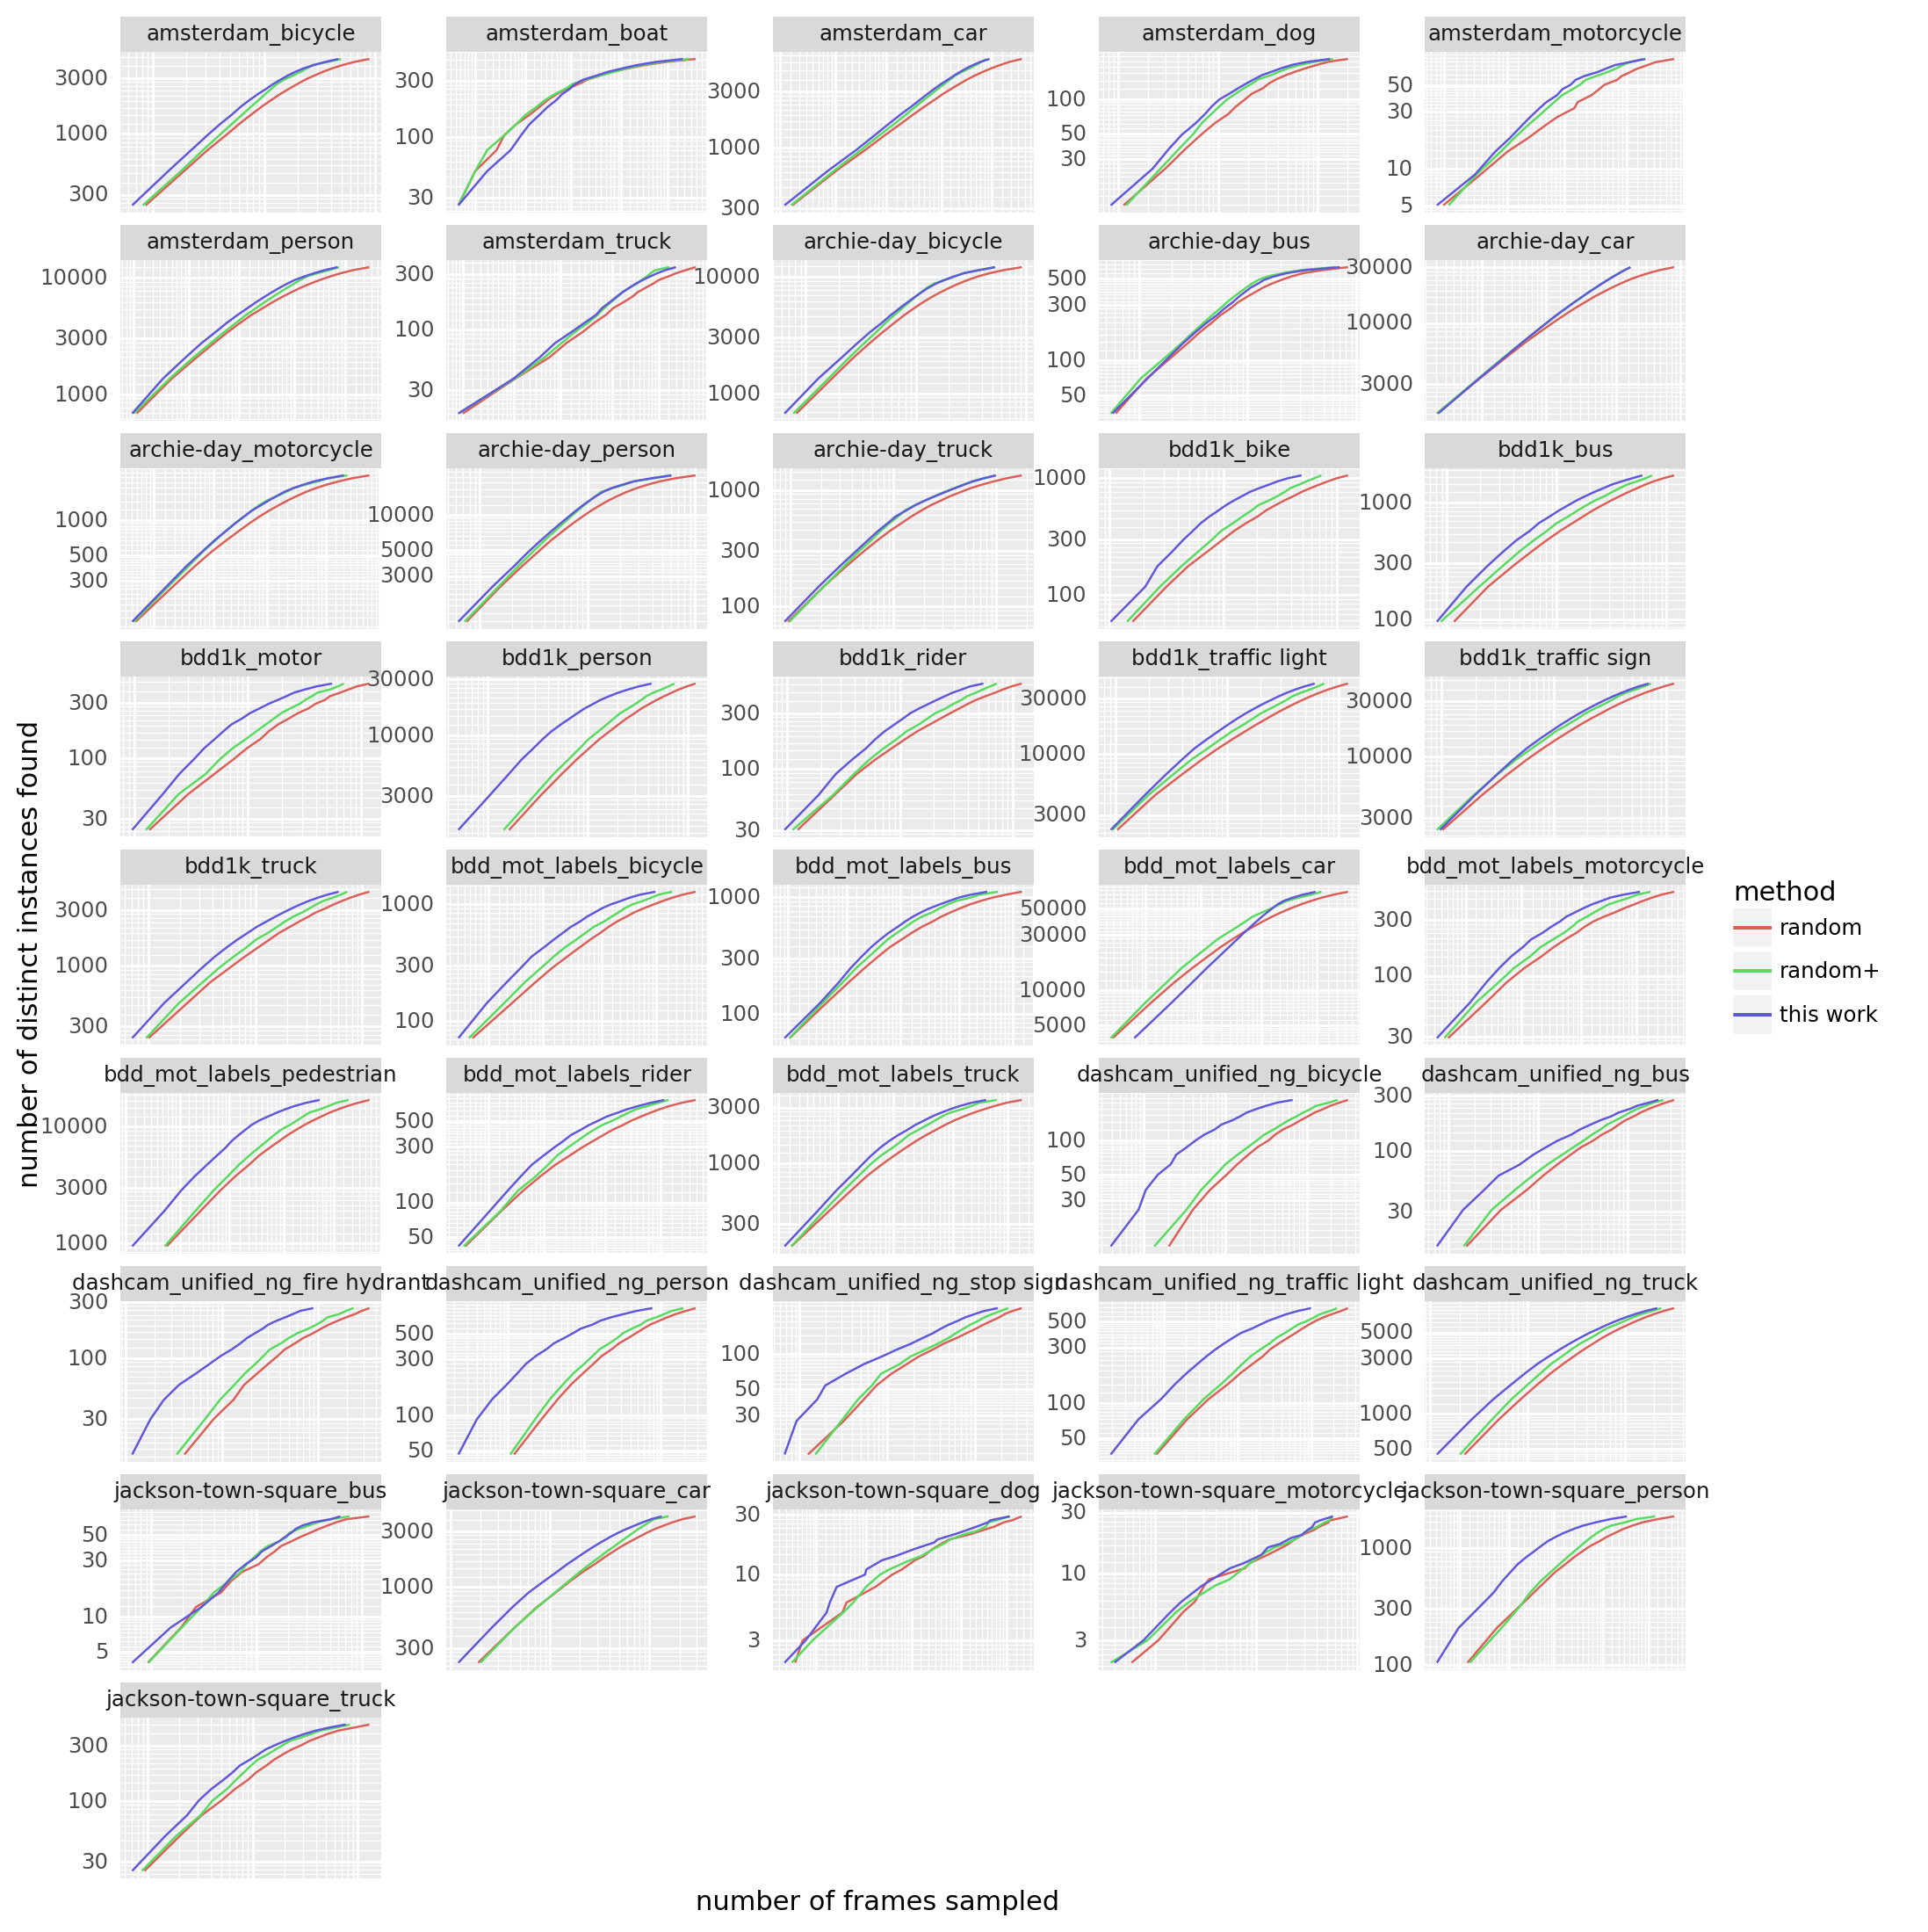

<ggplot: (-9223363257890239193)>

In [97]:
simplot